In [1]:
import cluster_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
#Demo data (you can run the following demo with your own data)
G=nx.barabasi_albert_graph(n=200, m=1)
initial_cluster = {}
confident = {} # it is a mapping, to specify which sets are confident sets
cluster_index=0
cluster_size=0
#create 15 confident sets with 12 nodes in each sets, other nodes are remaining nodes
for v in G.nodes():
    initial_cluster[v] = cluster_index
    cluster_size += 1
    if cluster_index >= 15:
        confident[cluster_index] = False
        cluster_index += 1
        cluster_size = 0
    if cluster_size == 12:
        confident[cluster_index] = True
        cluster_index += 1
        cluster_size = 0


Demo 0: Original Louvain

Demo 1: confident sets themselves do Louvain one_level & 
        remaining nodes themselves do Louvain one_level
        Run them together in 2nd, 3rd,... levels

Demo 2: add each remaining node to confident sets using
        Louvain method

Demo 3: confident sets themselves do Louvain one_level first 
        add each remaining node to confident sets using Louvain method


result of Demo 0
modularity = 0.6829499255069317


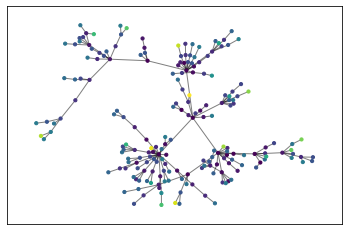

result of Demo 1
modularity = 0.6658796495038004


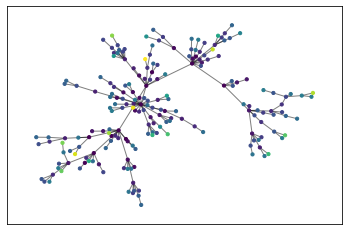

result of Demo 2
modularity = 0.1855761218151057


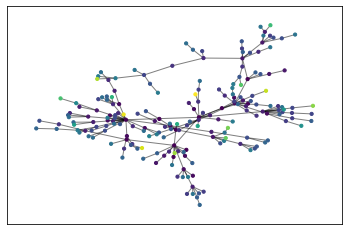

result of Demo 3
modularity = 0.675892022928714


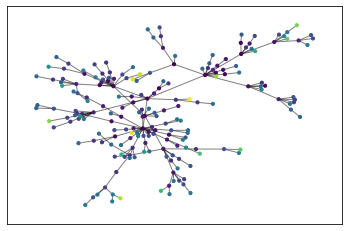

In [4]:
# result of each demo
for demo_index in range(4):
    print('result of Demo', demo_index)
    cluster_result=cluster_louvain.best_leveled_cluster(G, initial_cluster, mode=demo_index, is_confident=confident)
    mod = cluster_louvain.modularity(cluster_result, G)
    print('modularity =', mod)
    plt.figure(demo_index)
    pos = nx.spring_layout(G)
    cmap = cm.get_cmap('viridis', max(initial_cluster.values()) + 1)
    nx.draw_networkx_nodes(G, pos, initial_cluster.keys(), node_size=10, 
                           cmap=cmap, node_color=list(initial_cluster.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()